In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

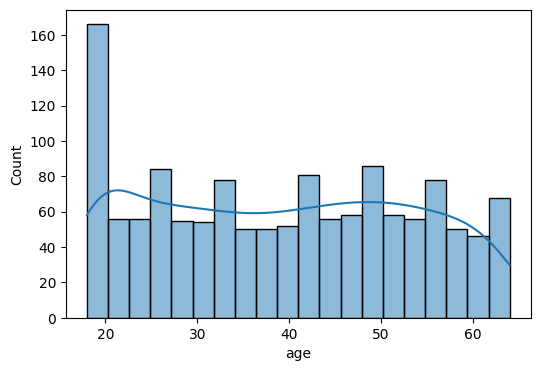

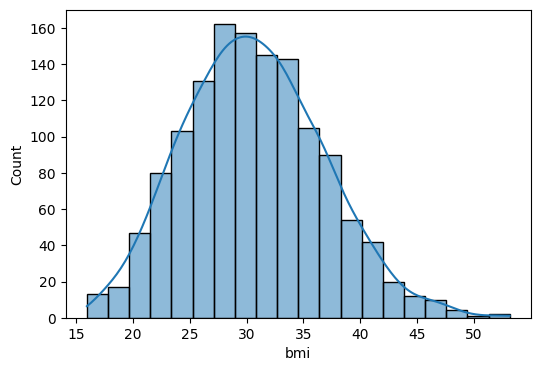

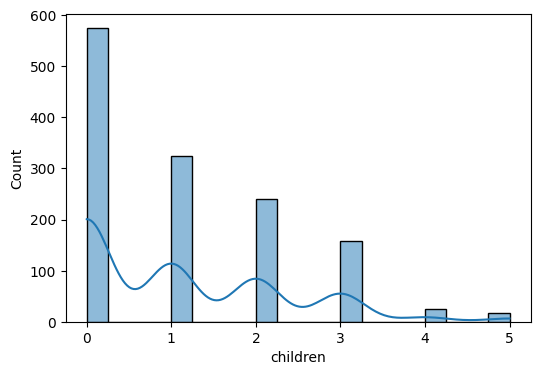

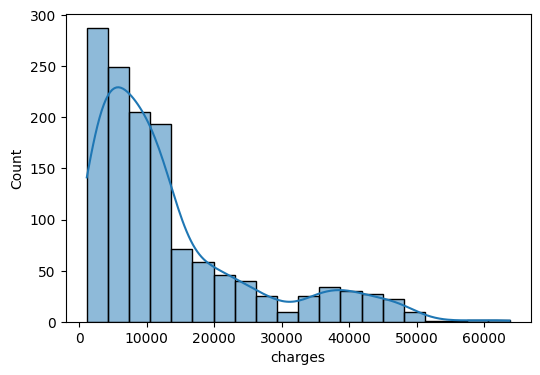

In [ ]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)

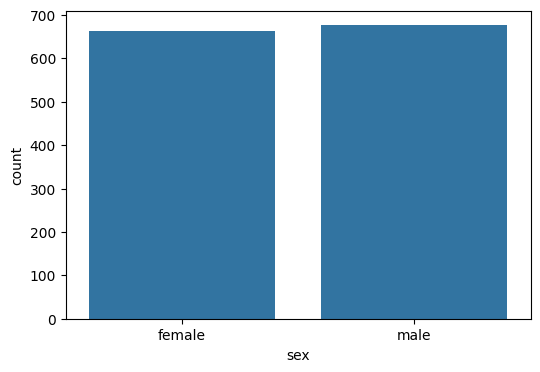

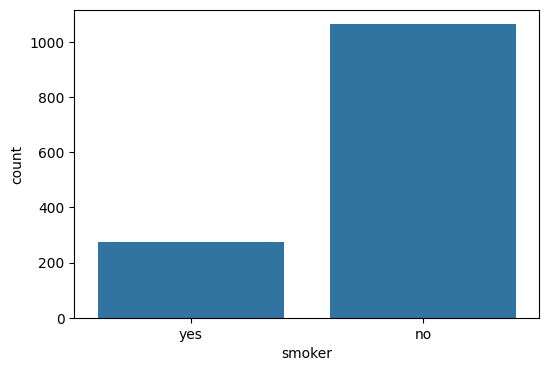

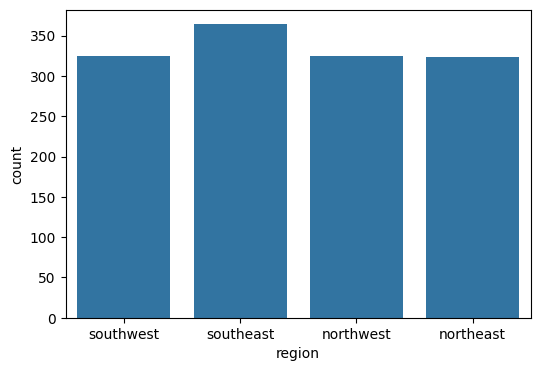

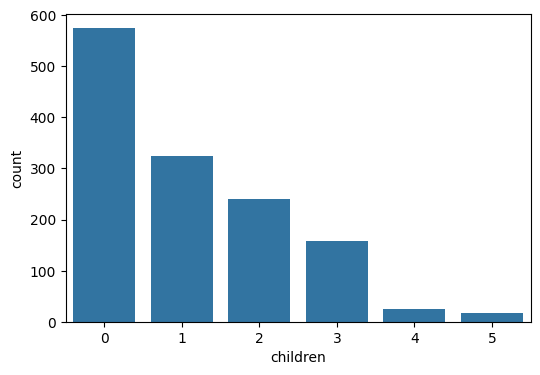

In [ ]:
categorical_columns = ['sex', 'smoker', 'region', 'children']
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])

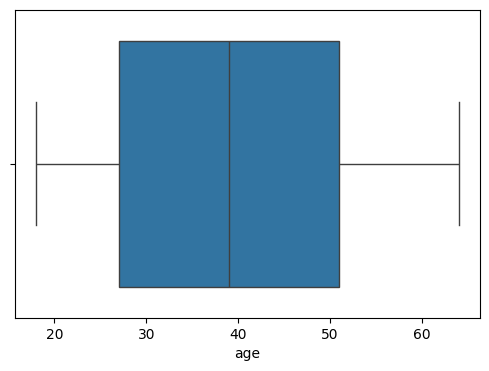

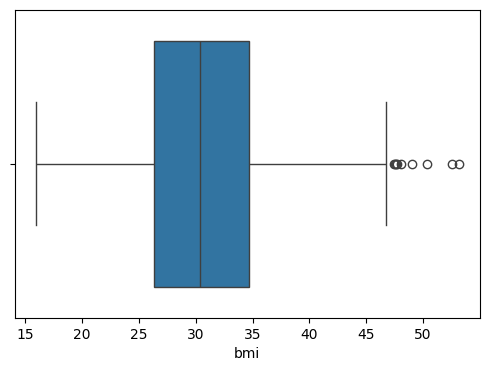

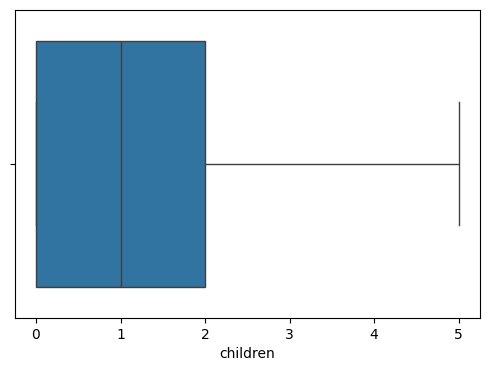

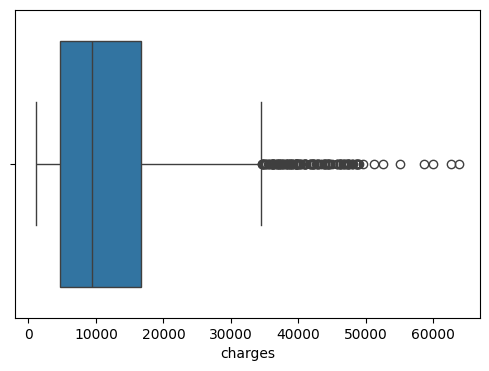

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

<Axes: >

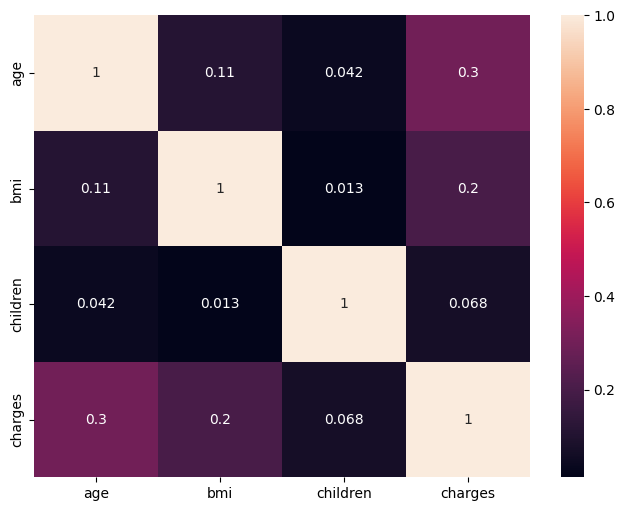

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Cleaning and Preprocessing

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df_cleaned.shape

(1338, 7)

In [ ]:
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
df_cleaned.shape

(1337, 7)

In [ ]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [ ]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [ ]:
df_cleaned["sex"] = df_cleaned["sex"].map({'female': 1, 'male': 0})
df_cleaned["smoker"] = df_cleaned["smoker"].map({'yes': 1, 'no': 0})

In [ ]:
df_cleaned.rename(columns={
    "sex": "is_female",
    "smoker": "is_smoker"
}, inplace=True)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
df_cleaned["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns=["region"], drop_first=True)

In [ ]:
df_cleaned = df_cleaned.astype(int)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# Feature Engineering

In [ ]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'obese']
)

In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=True)

In [ ]:
df_cleaned = df_cleaned.astype(int)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


# Feature Scaling

In [ ]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_obese'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


# Feature Extraction

In [ ]:
from scipy.stats import pearsonr

selected_features = [
    "age", "is_female", "bmi", "children", "is_smoker",
    "region_northwest", "region_southeast", "region_southwest",
    "bmi_category_Normal", "bmi_category_Overweight", "bmi_category_obese"
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlations_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_obese,0.200348
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [ ]:
cat_features = [
    'is_female', 'is_smoker', 'region_northwest', 'region_southeast',
    'region_southwest', 'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_obese'
]

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_result = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col] ,df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = "Reject Null (Keep Feature)" if p_val < alpha else "Accept Null (Drop Feature)"
    chi2_result[col] = {
        'chi2_statistics': chi2_stat,
        'p_value': p_val,
        'Descision': decision
    }

chi2_df = pd.DataFrame(chi2_result).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistics,p_value,Descision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [ ]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast', 'bmi_category_obese']]

In [ ]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_df.drop('charges', axis=1)
y = final_df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))
print(adjusted_r2)

0.8040712413347119
0.7987962362937233
